# Lung Cancer Survival Prediction



This notebook is designed to predict the survival of lung cancer patients based on various features using machine learning models.


In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

## Step 1: Load the Dataset

In [2]:
# Load the dataset
data = pd.read_csv('/kaggle/input/lung-cancer/dataset_med.csv')  # Replace with the correct file path
data.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


## Step 2: Data Preprocessing

In [3]:
# Convert categorical variables to numeric

label_encoders = {}
categorical_columns = ['gender', 'country', 'cancer_stage', 'family_history', 'smoking_status', 
                      'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type', 'survived']



for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le



# Drop irrelevant columns
data.drop(columns=['id', 'diagnosis_date', 'end_treatment_date'], inplace=True)
data.head()

,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived
0,64.0,1,26,0,1,3,29.4,199,0,0,1,0,0,0
1,50.0,0,19,2,1,3,41.2,280,1,1,0,0,3,1
2,65.0,0,12,2,1,1,44.0,268,1,1,0,0,1,0
3,51.0,0,1,0,0,3,43.0,241,1,1,0,0,0,0
4,37.0,1,17,0,0,3,19.7,178,0,0,0,0,1,0


## Step 3: Exploratory Data Analysis (EDA)

In [4]:
# Display dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                890000 non-null  float64
 1   gender             890000 non-null  int64  
 2   country            890000 non-null  int64  
 3   cancer_stage       890000 non-null  int64  
 4   family_history     890000 non-null  int64  
 5   smoking_status     890000 non-null  int64  
 6   bmi                890000 non-null  float64
 7   cholesterol_level  890000 non-null  int64  
 8   hypertension       890000 non-null  int64  
 9   asthma             890000 non-null  int64  
 10  cirrhosis          890000 non-null  int64  
 11  other_cancer       890000 non-null  int64  
 12  treatment_type     890000 non-null  int64  
 13  survived           890000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 95.1 MB


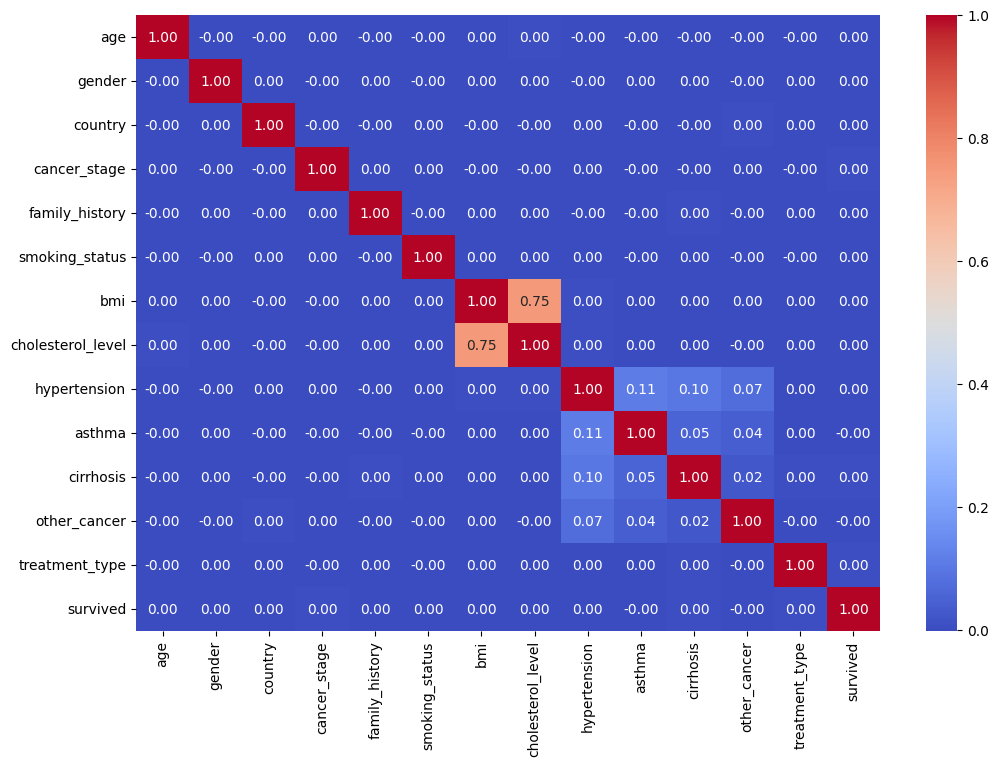

In [5]:
# Plotting correlation heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

## Step 4: Feature Scaling

In [6]:
# Define features and target variable
X = data.drop('survived', axis=1)
y = data['survived']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Step 5: Train-Test Split

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Step 6: Model Training with Random Forest

In [8]:
# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Step 7: Model Evaluation

In [9]:
# Make predictions and evaluate
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7776629213483146
Confusion Matrix:
[[138327    312]
 [ 39264     97]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.87    138639
           1       0.24      0.00      0.00     39361

    accuracy                           0.78    178000
   macro avg       0.51      0.50      0.44    178000
weighted avg       0.66      0.78      0.68    178000

